In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential    #building rnn
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM, Dropout  #model layer




In [6]:
data=pd.read_csv('swiggy.csv')
print(data.columns.tolist())

['ID', 'Area', 'City', 'Restaurant Price', 'Avg Rating', 'Total Rating', 'Food Item', 'Food Type', 'Delivery Time', 'Review']


In [5]:
data["Review"]=data["Review"].str.lower()
data["Review"] = data["Review"].replace(r'[^a-z0-9\s]', '', regex=True)
def label_sentiment_num(rating):
    if rating <= 2.5:
        return "negative"
    elif rating <= 3.5:
        return "neutral"
    else:
        return "positive"

data['sentiment'] = data['Avg Rating'].apply(label_sentiment_num)
data=data.dropna()
print(data)

        ID               Area       City  Restaurant Price  Avg Rating  \
0        1             Suburb  Ahmedabad               600         4.2   
1        2  Business District       Pune               200         4.7   
2        3             Suburb  Bangalore               600         4.7   
3        4  Business District     Mumbai               900         4.0   
4        5          Tech Park     Mumbai               200         4.7   
...    ...                ...        ...               ...         ...   
7995  7996        City Center     Mumbai               300         4.0   
7996  7997           Downtown    Chennai               100         4.7   
7997  7998          Tech Park    Chennai               900         4.5   
7998  7999           Old Town      Delhi               500         4.2   
7999  8000           Downtown      Delhi               400         4.5   

      Total Rating        Food Item       Food Type Delivery Time  \
0             6198            Sushi       

In [7]:
data.head()

,ID,Area,City,Restaurant Price,Avg Rating,Total Rating,Food Item,Food Type,Delivery Time,Review
0,1,Suburb,Ahmedabad,600,4.2,6198,Sushi,Fast Food,30-40 min,"Good, but nothing extraordinary."
1,2,Business District,Pune,200,4.7,4865,Pepperoni Pizza,Non-Vegetarian,50-60 min,"Good, but nothing extraordinary."
2,3,Suburb,Bangalore,600,4.7,2095,Waffles,Fast Food,50-60 min,Late delivery ruined it.
3,4,Business District,Mumbai,900,4.0,6639,Sushi,Vegetarian,50-60 min,Best meal I've had in a while!
4,5,Tech Park,Mumbai,200,4.7,6926,Spring Rolls,Gluten-Free,20-30 min,Mediocre experience.


In [8]:
data.sample(10)

,ID,Area,City,Restaurant Price,Avg Rating,Total Rating,Food Item,Food Type,Delivery Time,Review
1497,1498,Old Town,Pune,200,5.0,1561,Fish and Chips,Non-Vegetarian,30-40 min,Average taste.
3886,3887,Suburb,Bangalore,700,4.0,3775,Falafel Wrap,Vegetarian,30-40 min,Superb packaging and presentation.
1580,1581,Suburb,Kolkata,100,4.5,8833,Chicken Wings,Healthy,50-60 min,Highly recommended!
4829,4830,Residential Area,Mumbai,400,4.2,1188,Greek Salad,Fast Food,20-30 min,Cold and stale food.
5139,5140,Tech Park,Mumbai,600,4.2,1815,Pani Puri,Gluten-Free,50-60 min,Average taste.
7609,7610,Suburb,Pune,800,4.2,5980,Bubble Tea,Healthy,30-40 min,Best meal I've had in a while!
3276,3277,City Center,Delhi,700,4.5,922,Pani Puri,Vegan,50-60 min,Late delivery ruined it.
3372,3373,Business District,Mumbai,900,5.0,3850,Steak,Fast Food,50-60 min,Delicious and fresh.
3210,3211,Residential Area,Kolkata,100,4.0,8946,Momos,Healthy,30-40 min,Nothing special but edible.
5447,5448,Residential Area,Pune,800,3.0,1813,Bubble Tea,Vegan,20-30 min,Too spicy and oily.


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8000 non-null   int64  
 1   Area              8000 non-null   object 
 2   City              8000 non-null   object 
 3   Restaurant Price  8000 non-null   int64  
 4   Avg Rating        8000 non-null   float64
 5   Total Rating      8000 non-null   int64  
 6   Food Item         8000 non-null   object 
 7   Food Type         8000 non-null   object 
 8   Delivery Time     8000 non-null   object 
 9   Review            8000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 625.1+ KB


In [11]:
data.columns

Index(['ID', 'Area', 'City', 'Restaurant Price', 'Avg Rating', 'Total Rating',
       'Food Item', 'Food Type', 'Delivery Time', 'Review'],
      dtype='object')

In [12]:
data.describe()

,ID,Restaurant Price,Avg Rating,Total Rating
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,4000.50000,544.587500,4.129900,4979.977500
std,2309.54541,287.968871,0.645791,2877.285148
min,1.00000,100.000000,3.000000,51.000000
25%,2000.75000,300.000000,3.500000,2476.000000
50%,4000.50000,500.000000,4.200000,4989.500000
75%,6000.25000,800.000000,4.700000,7498.000000
max,8000.00000,1000.000000,5.000000,10000.000000


In [13]:
data.shape

(8000, 10)

In [16]:
data.isnull().sum()

ID                  0
Area                0
City                0
Restaurant Price    0
Avg Rating          0
Total Rating        0
Food Item           0
Food Type           0
Delivery Time       0
Review              0
dtype: int64

In [17]:
data.duplicated().sum()

np.int64(0)

In [15]:
data['Review'].value_counts()

Review
Perfectly cooked and well-seasoned.    471
Tasty and worth the price.             467
Highly recommended!                    464
Superb packaging and presentation.     449
My new favorite dish!                  446
Amazing taste and quick delivery.      437
Delicious and fresh.                   432
Best meal I've had in a while!         413
Absolutely loved it!                   395
Nothing special but edible.            288
A decent meal.                         287
Neither great nor bad.                 267
Good, but nothing extraordinary.       265
Would order again if needed.           265
Standard quality.                      260
Average taste.                         259
It was okay.                           251
Mediocre experience.                   249
Too spicy and oily.                    198
Disappointed.                          192
Worst experience ever.                 184
Not worth the price.                   183
Wouldn't order again.                  179
Not 

In [19]:
data['Avg Rating'].unique()

array([4.2, 4.7, 4. , 4.5, 3. , 5. , 3.5])

In [20]:
data['Total Rating'].unique()

array([6198, 4865, 2095, ..., 4645, 3218, 7739], shape=(5537,))

In [22]:
data['Delivery Time'].unique()

array(['30-40 min', '50-60 min', '20-30 min', '40-50 min'], dtype=object)

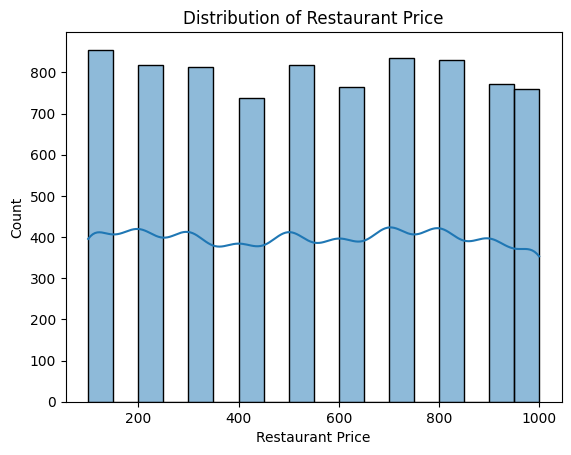

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['Restaurant Price'], kde=True)
plt.title('Distribution of Restaurant Price')
plt.show()

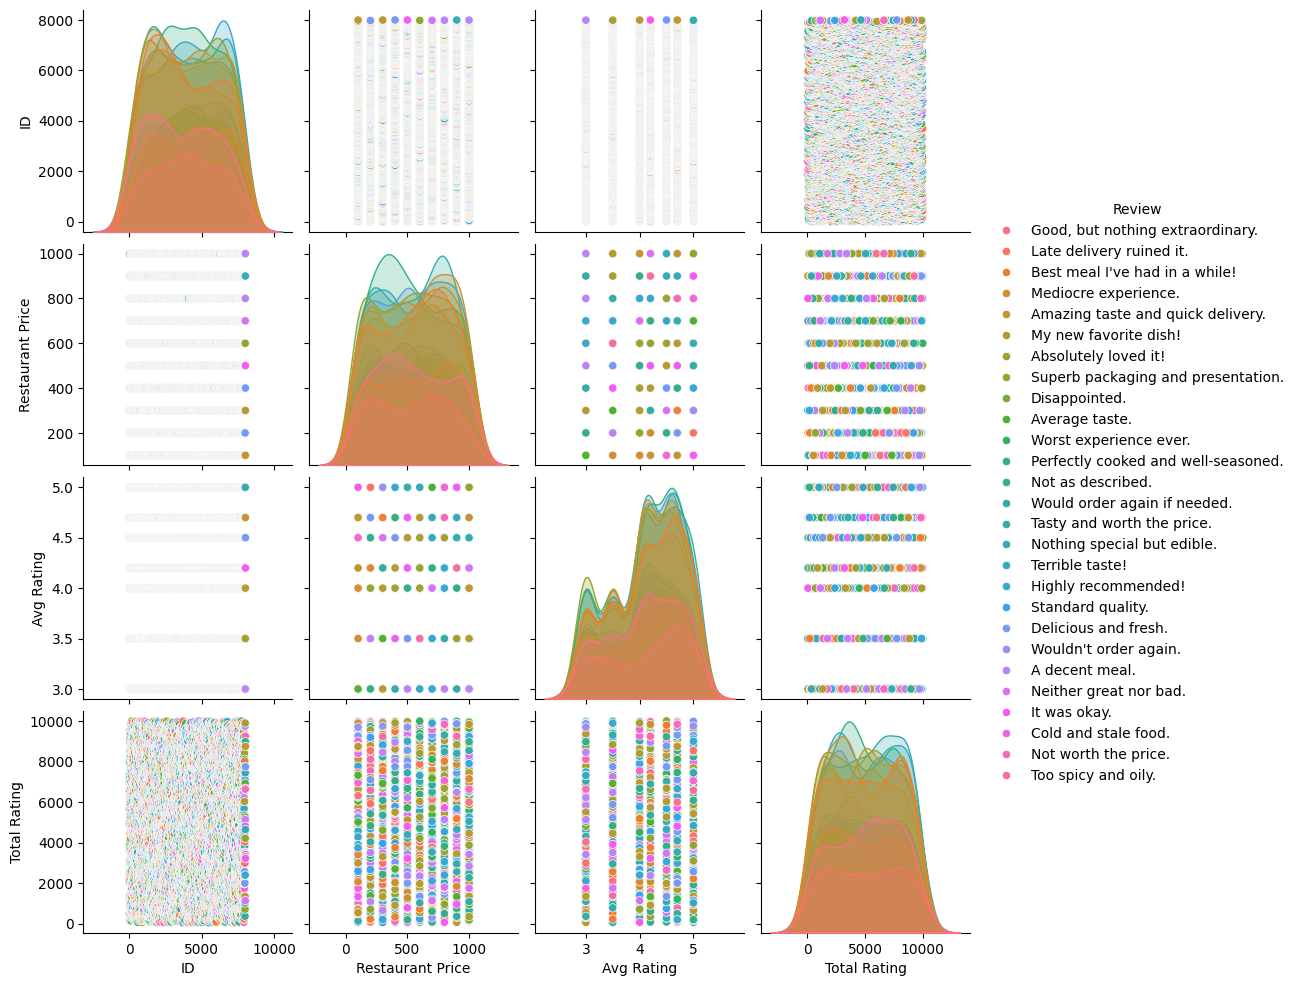

In [27]:
sns.pairplot(data=data, hue='Review')

In [ ]:
max_features = 5000   
max_length = 200    
def build_vocab(texts, max_features=None):
    word_counts = {}
    for text in texts:
        for word in text.split():
            word_counts[word] = word_counts.get(word, 0) + 1

    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    #limited vocab
    if max_features:
        sorted_words = sorted_words[:max_features]

    word_index = {word: idx+1 for idx, (word, _) in enumerate(sorted_words)}
    return word_index

word_index = build_vocab(data["Review"].tolist(), max_features=max_features)


def texts_to_sequences(texts, word_index):
    sequences = []
    for text in texts:
        seq = [word_index.get(word, 0) for word in text.split()]  
        sequences.append(seq)
    return sequences

sequences = texts_to_sequences(data["Review"].tolist(), word_index)

def pad_sequences_custom(sequences, maxlen):
    padded = []
    for seq in sequences:
        if len(seq) < maxlen:
            # pad with zeros at the beginning
            seq = [0]*(maxlen - len(seq)) + seq
        else:
            # truncate 
            seq = seq[:maxlen]
        padded.append(seq)
    return np.array(padded)  

X = pad_sequences_custom(sequences, max_length)
y = data['sentiment'].values


KeyError: 'Sentiment'

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)


In [31]:


max_words = 5000  # same as tokenizer
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")   # 3 classes
])


model.compile(
    loss="sparse_categorical_crossentropy",  # for integer labels
    optimizer="adam",
    metrics=["accuracy"]
)



model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
encoder = LabelEncoder()
y = encoder.fit_transform(data["Review"])

y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

# Convert to numpy arrays of floats 
y_train = np.array(y_train).astype("float32")
y_val = np.array(y_val).astype("float32")
y_test = np.array(y_test).astype("float32")


In [34]:
y_train = y_train.astype("float32")
y_val = y_val.astype("float32")
y_test = y_test.astype("float32")



In [36]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,        # train longer
    batch_size=64
)


loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "c:\Users\hp\.conda\envs\tf_env\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\hp\.conda\envs\tf_env\lib\runpy.py", line 86, in _run_code

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelapp.py", line 758, in start

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\tornado\platform\asyncio.py", line 211, in start

  File "c:\Users\hp\.conda\envs\tf_env\lib\asyncio\base_events.py", line 603, in run_forever

  File "c:\Users\hp\.conda\envs\tf_env\lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Users\hp\.conda\envs\tf_env\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\utils.py", line 71, in preserve_context

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 614, in shell_main

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_shell

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 366, in execute_request

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 827, in execute_request

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 458, in do_execute

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\ipykernel\zmqshell.py", line 663, in run_cell

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3077, in run_cell

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3132, in _run_cell

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3336, in run_cell_async

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3519, in run_ast_nodes

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code

  File "C:\Users\hp\AppData\Local\Temp\ipykernel_14692\2280218221.py", line 1, in <module>

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 399, in fit

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 241, in function

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 154, in multi_step_on_iterator

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 125, in wrapper

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 134, in one_step_on_data

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 62, in train_step

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\trainers\compile_utils.py", line 699, in __call__

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\trainers\compile_utils.py", line 724, in call

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\losses\losses.py", line 2330, in sparse_categorical_crossentropy

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\ops\nn.py", line 2016, in sparse_categorical_crossentropy

  File "c:\Users\hp\.conda\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 753, in sparse_categorical_crossentropy

Received a label value of 26 which is outside the valid range of [0, 3).  Label values: 2 14 5 17 14 4 12 18 1 18 13 21 20 2 17 22 14 6 25 18 2 18 0 9 2 0 20 6 1 13 19 0 26 18 23 22 19 18 12 25 20 16 20 25 17 13 3 18 13 16 11 24 5 21 6 16 1 0 15 8 11 1 20 8
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_4278]